
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Tuesday, September 17 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)


# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so,  please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise. 


## Answer


1.
We can think of each $X_{i}$'s as a Bernoulli Random Variable with $P(X_{i}=1)=p$,

whose probability mass function, $f$ , can be written as
$$
f(X_{i};p)=p^{X_i} (1-p)^{1-X_{i}}
$$

And because tosses are independent, the joint probability mass function is
<br/><br/>
$$
f(X_1,...,X_n;p)=\prod\limits_i f(X_i;p)=p^{\sum X_i} (1-p)^{n-\sum X_i}
$$


The log-likelihood can be written as
$$
\mathcal{L}(p;x_1,...,x_n)=f(x_1,...,x_n;p)
$$
<br/><br/>
$$
\log\mathcal{L}(p)=\sum X_i\log p + (n-\sum X_i)\log(1-p)
$$

2.
2.
Now, we want to find a $p$ that maximizes our log-likelihood. We do so by taking the derivative of log-likelihood and equating it to 0.
<br/><br/>
$$\frac{\partial\log\mathcal{L}(p)}{\partial p}
= \frac{\sum X_i}{p} - \frac{n-\sum X_i}{1-p}
= \frac{(1-p)\sum X_i -pn +p \sum X_i}{p(1-p)}
= \frac{\sum X_i -pn}{p(1-p)} = 0.$$
<br/><br/>
We get
$$p = \frac{\sum X_i}{n} $$

3.
3.
An estimator is unbiased if the expected value of the estimator is equal to the value of the parameter.

Let the MLE estimate of $p$ obtained above be denoted as $\hat{p}$ ,
then,
$$E(\hat{p})=E(\frac{\sum_{i=1}^{n}X_{i}}{n})=\frac{1}{n}\sum_{i=1}^{n}E(X_{i})$$
$$=\frac{1}{n}\sum_{i=1}^{n}p=\frac{1}{n}(np)=p$$

Therefore, we can conclude that the obtained estimator is unbiased.



# Question 2: MLE Estimate (5+10+10 points)

Consider a coin tossing experiment where a biased coin is tossed repeatedly for $n$ times with independence in successive tosses. 
If we record the outcome of each toss as $X_{i}$, for $i \in \{1,2,3,....,n\}$ as follows

$  
X_{i} = 
     \begin{cases}
       \text{1,} &\quad\text{if $i^{th}$ toss results in $Heads$,}\\
       \text{0,} &\quad\text{otherwise.} \\ 
     \end{cases}
$

then $X_{1}, X_{2}, .... X_{n}$ will be a sequence of $0$'s and $1$'s. Assume that for this coin $P(Heads) = p$. 

1. The log-likelihood function of the observations, as discussed in the class, denotes the probability of occurance of the observations. Write the log-likelihood function for the observations $X_{1}, X_{2}, .... X_{n}$. 

2. Compute an MLE estimate of $p$.

3. Check if the obtained estimate is unbiased.


# Question 3: Multiple Linear Regression in Python (30 pts)

Use the following code to import the California housing prices dataset and linear models in python. The dataset is taken from https://www.kaggle.com/camnugent/california-housing-prices/version/1. I have removed the categorical variables and rows with missing variables to make it easire to run the models. 


In [21]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None


train_df = pd.read_csv("reduced_data.csv")
X = train_df.drop(['median_house_value'],axis=1)
Y = train_df['median_house_value']

a. (2 pts) Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set, using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with test_size = 0.30 and random_state = 11. Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MAE values thus obtained.

d.  (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set (you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)). Report the variables which have magnitude of correlation greater than 0.9 w.r.t the variable 'households'. 

e.  (6 pts) Add the following independent variables to both train and test sets:
1. average_bedrooms = total_bedrooms/households
2. average_rooms = total_rooms/households
3. average_population = population/households

Recalculate the correlation matrix. What do you observe about the correlation values of the above new variables?

f. (5 pts) Fit an MLR on the new train data (with additional independent variables) and report the MAE on the new train and test sets.

## Answer

## (a)

In [22]:
print(X.shape)
print(X[:5])

(20433, 8)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  
0       322.0       126.0         8.3252  
1      2401.0      1138.0         8.3014  
2       496.0       177.0         7.2574  
3       558.0       219.0         5.6431  
4       565.0       259.0         3.8462  


## (b)

In [23]:
clf = linear_model.LinearRegression()
clf.fit(X, Y)

# print intercept and coefficients
print('Intercept: ', clf.intercept_)
print('Coef: ', clf.coef_)

predictions = clf.predict(X)

mae = mean_absolute_error(Y, predictions)
print('MAE: ', mae)

Intercept:  -3585395.747893059
Coef:  [-4.27301205e+04 -4.25097369e+04  1.15790031e+03 -8.24972507e+00
  1.13820707e+02 -3.83855780e+01  4.77013513e+01  4.02975217e+04]
MAE:  50799.63072895316


## (c)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=11)

clf_train = linear_model.LinearRegression()
clf_train.fit(X_train, Y_train)
predictions_train = clf_train.predict(X_train)
mae_train = mean_absolute_error(Y_train, predictions_train)
print('MAE train: ', mae_train)
predictions_test = clf_train.predict(X_test)
mae_test = mean_absolute_error(Y_test, predictions_test)
print('MAE test: ', mae_test)

MAE train:  50749.10314465323
MAE test:  50916.74299435099


## (d)

In [25]:
X_train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.925627,-0.111272,0.042788,0.069305,0.101596,0.056116,-0.020466
latitude,-0.925627,1.000000,0.013098,-0.034147,-0.066424,-0.109600,-0.070537,-0.074943
housing_median_age,-0.111272,0.013098,1.000000,-0.356534,-0.316644,-0.294652,-0.298702,-0.115736
total_rooms,0.042788,-0.034147,-0.356534,1.000000,0.927454,0.859323,0.916556,0.198486
total_bedrooms,0.069305,-0.066424,-0.316644,0.927454,1.000000,0.880929,0.979547,-0.013082
population,0.101596,-0.109600,-0.294652,0.859323,0.880929,1.000000,0.910283,-0.001523
households,0.056116,-0.070537,-0.298702,0.916556,0.979547,0.910283,1.000000,0.008033
median_income,-0.020466,-0.074943,-0.115736,0.198486,-0.013082,-0.001523,0.008033,1.000000


Independent variables having correlation greater than 0.9 w.r.t 'households': 
1. Total_rooms
2. Total_bedrooms
3. Population


## (e)

In [26]:
X_train['avg_bedrooms'] = X_train['total_bedrooms']/X_train['households']
X_train['avg_rooms'] = X_train['total_rooms']/X_train['households']
X_train['avg_population'] = X_train['population']/X_train['households']

X_test['avg_bedrooms'] = X_test['total_bedrooms']/X_test['households']
X_test['avg_rooms'] = X_test['total_rooms']/X_test['households']
X_test['avg_population'] = X_test['population']/X_test['households']

X_train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,avg_bedrooms,avg_rooms,avg_population
longitude,1.000000,-0.925627,-0.111272,0.042788,0.069305,0.101596,0.056116,-0.020466,0.017548,-0.027099,0.011811
latitude,-0.925627,1.000000,0.013098,-0.034147,-0.066424,-0.109600,-0.070537,-0.074943,0.062059,0.104294,-0.002330
housing_median_age,-0.111272,0.013098,1.000000,-0.356534,-0.316644,-0.294652,-0.298702,-0.115736,-0.077163,-0.158539,0.012569
total_rooms,0.042788,-0.034147,-0.356534,1.000000,0.927454,0.859323,0.916556,0.198486,0.036170,0.146227,-0.031031
total_bedrooms,0.069305,-0.066424,-0.316644,0.927454,1.000000,0.880929,0.979547,-0.013082,0.054525,0.004237,-0.036556
population,0.101596,-0.109600,-0.294652,0.859323,0.880929,1.000000,0.910283,-0.001523,-0.062026,-0.072951,0.077684
households,0.056116,-0.070537,-0.298702,0.916556,0.979547,0.910283,1.000000,0.008033,-0.050050,-0.081950,-0.034892
median_income,-0.020466,-0.074943,-0.115736,0.198486,-0.013082,-0.001523,0.008033,1.000000,-0.059447,0.350785,0.000417
avg_bedrooms,0.017548,0.062059,-0.077163,0.036170,0.054525,-0.062026,-0.050050,-0.059447,1.000000,0.833841,-0.002194
avg_rooms,-0.027099,0.104294,-0.158539,0.146227,0.004237,-0.072951,-0.081950,0.350785,0.833841,1.000000,0.003475


The new variables have a low correlation with the 'households' variable.

## (f)

In [27]:
clf_train = linear_model.LinearRegression()
clf_train.fit(X_train, Y_train)
predictions_train = clf_train.predict(X_train)
mae_train = mean_absolute_error(Y_train, predictions_train)
print('MAE train: ', mae_train)
predictions_test = clf_train.predict(X_test)
mae_test = mean_absolute_error(Y_test, predictions_test)
print('MAE test: ', mae_test)

MAE train:  50474.26879145709
MAE test:  50783.97460392823


# Question 4: Ridge and Lasso Regression (30 points)


Using the same data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Use the same train and test data with additional augmented columns from before. Scale the data so that each of the dependent variables have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

In [28]:
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV


1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

5) Why did we have to scale the data before regularization? (5pts)


## Answer



## 1

In [29]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
#its fine to scale them together and then split also, the answers will
#vary little
#full credit is given to students who use the standard scaler also

n_folds = 5
k_fold = KFold(n_folds)
lasso_alphas =  10**np.linspace(10,-2,100)*0.5       #(start at 10, end at -2 )           
lasso_avg_rmse = {}

for alpha in lasso_alphas:
    lasso = linear_model.Lasso(alpha=alpha, tol=0.1)
    avg_mse = 0
    for k, (train, test) in enumerate(k_fold.split(X_train, Y_train)):
        lasso.fit(X_train[train], Y_train[train])
        avg_mse = avg_mse + mean_squared_error(Y_train[test], lasso.predict(X_train[test])) 
    lasso_avg_rmse[alpha] = avg_mse / n_folds
print(lasso_avg_rmse[0.005]) #since many ppl in the class reported this 
print(lasso_avg_rmse[66.09705742330144])
best_alpha_lasso = min(lasso_avg_rmse, key=lasso_avg_rmse.get)


print("Best lasso alpha: {}".format(best_alpha_lasso))
print("full credit is awarded for 0.05 also")

ridge_alphas =  10**np.linspace(10,-2,100)*0.5
ridge_avg_rmse = {}

for alpha in ridge_alphas:
    ridge = linear_model.Ridge(alpha=alpha)
    avg_mse = 0
    for k, (train, test) in enumerate(k_fold.split(X_train, Y_train)):
        ridge.fit(X_train[train], Y_train[train])
        avg_mse = avg_mse + mean_squared_error(Y_train[test], ridge.predict(X_train[test])) 
    ridge_avg_rmse[alpha] = avg_mse / n_folds
best_alpha_ridge = min(ridge_avg_rmse, key=ridge_avg_rmse.get)
# print(min(ridge_avg_rmse))
print("Best ridge alpha: {}".format(best_alpha_ridge))
print("full credit is awarded for students using standrad scaler also")


4828842586.394724
4825614296.808476
Best lasso alpha: 66.09705742330144
full credit is awarded for 0.05 also
Best ridge alpha: 37.823166377731454
full credit is awarded for students using standrad scaler also


## 2

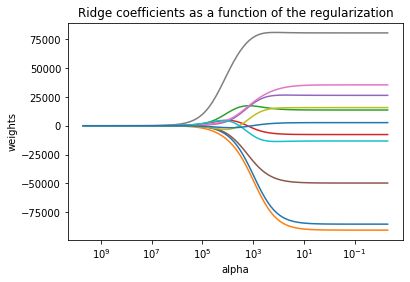

In [10]:
alphas = 10**np.linspace(10,-2,100)*0.5 

ridge = linear_model.Ridge(alpha=alpha)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

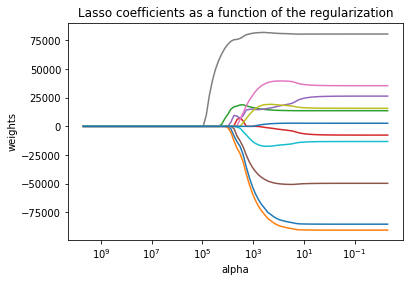

In [11]:
alphas = 10**np.linspace(10,-2,100)*0.5  #start at 10 stop at -2 give 100 numbers

lasso = linear_model.Lasso(alpha=alpha,tol=.1)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a,tol=.1)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

## 3

In [47]:
linear_clf = linear_model.LinearRegression()
ridge_clf = linear_model.Ridge(alpha=best_alpha_ridge)
lasso_clf = linear_model.Lasso(alpha=best_alpha_lasso,tol=.1)#, max_iter=100000)#,tol=1)

def fit_reg(model, name):
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    mse = mean_absolute_error(pred, Y_test)
    print("MSE for {0}: {1}".format(name, mse))

fit_reg(linear_clf, "linear")
fit_reg(ridge_clf, "ridge")
fit_reg(lasso_clf, "lasso") #many students reorted a higher mse for lasso, but are awarded full credit

MSE for linear: 50682.397574551534
MSE for ridge: 50635.11503256429
MSE for lasso: 50657.45620173661


## 4

In [13]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=1000000)
lassocv.fit(X_train, Y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [14]:
lassocv.alpha_

161.80167643776653

In [52]:
lasso = linear_model.Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)
mse = mean_absolute_error(Y_test, lasso.predict(X_test))
print(mse)
print(lasso.coef_)

50681.95000148011
[-83729.40788737 -88966.60778197  13793.24655891  -5441.52359581
  24891.29887821 -48359.51663192  33593.70067617  79916.03828368
  14815.92067716 -12517.52849661   2360.88791625]


## 5

Scaling is done before regularization to ensure that all parameters are penalized equally. If different variables have different scale of values, then their corresponding parameters will also be in a different scale and hence will be penalized unequally during regularization.

# Question 5 (5pts)

How do you think the performance of your model varies in the train and test set as you increase(decrease) the number of examples in the training dataset? Explain why does it change in a particular way.

### Answer

As the number of instances for training is increased, the model is able to generalise better which is indicated by improvement in performance on the test data. The performance on the train data may improve or deteriorate depending upon the percentage of noise in the data. On the other hand, the decrease in the size of the training data causes the model to overfit.